#### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
%matplotlib inline

#### Importing the dataset

In [2]:
df_valid_train = pd.read_csv('cv-valid-train.csv')
df_valid_test = pd.read_csv('cv-valid-test.csv')
df_valid_dev = pd.read_csv('cv-valid-dev.csv')

df_other_train = pd.read_csv('cv-valid-train.csv')
df_other_test = pd.read_csv('cv-valid-test.csv')
df_other_dev = pd.read_csv('cv-valid-dev.csv')

df_invalid = pd.read_csv('cv-invalid.csv')

In [3]:
### Concatenating the dataframes
df = pd.concat([df_valid_train,df_valid_test,df_valid_dev,df_other_train,df_other_test,df_other_dev,df_invalid])

<AxesSubplot:>

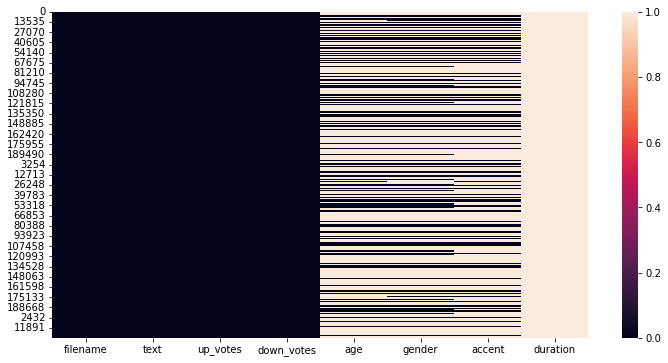

In [4]:
### Checking for the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [5]:
### dropping the column because of the missing values
df = df.drop('duration',axis=1)

In [6]:
print(df.shape)
df = df.dropna()
print(df.shape)

(433097, 7)
(136525, 7)


In [7]:
df.head()

,filename,text,up_votes,down_votes,age,gender,accent
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia


In [8]:
### dropping the columns
df = df.drop(['text','up_votes','down_votes'],axis=1)

In [9]:
df.head()

,filename,age,gender,accent
5,cv-valid-train/sample-000005.mp3,twenties,female,us
8,cv-valid-train/sample-000008.mp3,seventies,male,us
13,cv-valid-train/sample-000013.mp3,thirties,female,us
14,cv-valid-train/sample-000014.mp3,sixties,male,england
19,cv-valid-train/sample-000019.mp3,fifties,male,australia


In [10]:
df['gender'].value_counts()

male      99194
female    35746
other      1585
Name: gender, dtype: int64

In [13]:
### Removing the observations with other gender due to the underbalance 
index = list(df[df['gender']=='other'].index)

df = df.drop(index)
### resetting the index
df = df.reset_index()
df = df.drop('index', axis = 1)

In [19]:
### Function to change the filename according to the path
def func(fileName):
    
    fileName = fileName.replace('/','\\')
    fileName = 'C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\' + fileName
    return fileName

In [20]:
df['filename'] = df['filename'].apply(lambda x:func(x))

In [21]:
df = df.drop_duplicates(subset=['filename'])

In [22]:
### moving all the files relevant to us to the same folder
def moving(fileName):
    
    source = fileName
    index_m = source.index('m')
    index_v = source.index('v')
    fileName = fileName[index_v-1:index_m-3] + '_' + fileName[index_m-2:]
    destination = 'C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\Final Destination\\' + fileName
    os.rename(source,destination)

In [27]:
for i in range(len(df_invalid)):
    moving(df['filename'][i])

In [60]:
### Saving the dataset
df.to_csv('metadata.csv')

In [2]:
df = pd.read_csv('metadata.csv')

##### converting the audio files to array's

In [28]:
df.head()

,filename,age,gender,accent
0,C:\Users\Dell\Desktop\Audio Recognition Projec...,twenties,female,us
1,C:\Users\Dell\Desktop\Audio Recognition Projec...,seventies,male,us
2,C:\Users\Dell\Desktop\Audio Recognition Projec...,thirties,female,us
3,C:\Users\Dell\Desktop\Audio Recognition Projec...,sixties,male,england
4,C:\Users\Dell\Desktop\Audio Recognition Projec...,fifties,male,australia


In [29]:
### Changing the filenames to filepaths with all the files in the same folder
def filename_change(fileName):
    
    index = fileName.index('v')
    name = fileName[index-1:].replace('\\','_')[:-3] + 'wav'
    filename = 'C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\Common Voice WAV\\' + name
    return filename

In [30]:
df['filename'] = df['filename'].apply(lambda x:filename_change(x))

In [35]:
df = df.reset_index()
df = df.drop('index',axis=1)

In [36]:
df.to_csv('metadata_final.csv',index=False)

#### Feature Extraction

In [4]:
df = pd.read_csv('metadata_final.csv')

In [18]:
### extract the features from the audio files using mfcc
def feature_extracter(fileName):
    audio,sample_rate = librosa.load(fileName,res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=30)
    mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
    
    return list(mfccs_scaled_features)

In [19]:
len(feature_extracter('C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\Common Voice WAV\\cv-valid-train_sample-000005.wav'))

128

In [7]:
feature_extraction_dataset = []

In [ ]:
for i in range(len(df)):
    data = feature_extracter(df['filename'][i])
    data.append(df['age'][i])
    data.append(df['gender'][i])
    data.append(df['accent'][i])
    feature_extraction_dataset.append(data)
    #print("{} files completed".format(i))

In [9]:
### converting the list to dataframe
feature_extraction_dataset = pd.DataFrame(feature_extraction_dataset)

In [11]:
feature_extraction_dataset

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,-583.109741,100.370453,0.943254,48.706886,-10.540771,0.412921,-18.057110,-8.326262,-1.521947,-12.522870,...,-0.192631,-0.315564,0.343298,-0.402466,0.258311,-0.296783,0.058532,twenties,female,us
1,-394.043793,99.290733,-38.356846,36.202087,13.018510,-0.332277,-30.521049,-24.611736,-20.024382,-8.018195,...,-0.181873,-0.617222,-0.203300,0.066065,0.179560,-0.035815,0.082535,seventies,male,us
2,-329.927063,89.804878,-93.255318,53.524906,-14.073633,-17.782843,-30.973644,-11.115297,1.704327,-15.689195,...,-0.064750,-0.154670,0.144096,0.340831,0.397898,0.183917,-0.035574,thirties,female,us
3,-544.498352,80.187973,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,-0.293615,-0.154340,-0.152312,-0.136096,-0.248668,-0.185580,-0.021339,sixties,male,england
4,-265.772156,105.103935,9.275388,27.494017,1.308293,28.853981,-11.553514,19.866306,-9.072405,16.467325,...,-0.064412,-0.548103,-0.691253,-0.090602,-0.078694,-0.036180,-0.491893,fifties,male,australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69900,-376.485321,119.770882,-0.661368,10.842854,11.884736,4.807947,0.221877,14.571591,-7.106067,8.881387,...,-0.514412,-0.419168,0.386208,0.013728,-0.990892,-0.474937,-0.042218,teens,male,us
69901,-1131.370972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sixties,male,us
69902,-265.763916,114.194046,-22.393890,23.325445,-6.324882,14.880446,-5.550321,8.608303,-9.489439,4.931038,...,-1.028494,-0.561055,-0.638143,-0.282054,-0.419412,-0.193380,0.354584,twenties,male,indian
69903,-494.448547,56.549568,-10.677488,6.895159,-0.068489,2.941504,-14.531470,2.231544,-4.246867,-1.574609,...,0.236807,0.881689,0.132002,-0.214825,0.143224,0.034405,-0.521862,sixties,female,us


In [ ]:
### naming the features for convenience
col_name = []
for i in range(1,31):
    col_name.append('Feature_'+str(i))
col_name = col_name + ['age','gender','accent']
feature_extraction_dataset.columns = col_name

In [9]:
feature_extraction_dataset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,age,gender,accent
0,-583.109741,100.370453,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-2.081630,-4.345325,-5.543271,0.867665,-2.325722,-4.993744,-2.170289,twenties,female,us
1,-394.043793,99.290733,-38.356846,36.202087,13.018513,-0.332277,-30.521049,-24.611736,-20.024382,-8.018195,...,-5.490204,-5.979488,-5.525753,-3.199488,-12.229231,2.510893,-1.527913,seventies,male,us
2,-329.927063,89.804886,-93.255318,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-2.942057,-3.899509,5.903738,-2.495930,4.284184,2.987215,-1.986013,thirties,female,us
3,-544.498291,80.187973,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,-3.014753,-1.035969,-4.900939,-1.521831,-3.017688,-1.510514,2.014324,sixties,male,england
4,-265.772156,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,1.660018,-2.550889,1.886928,-5.248073,1.555064,-0.886034,-0.406267,fifties,male,australia


In [10]:
feature_extraction_dataset.to_csv('features_data.csv',index=False)

#### Exploratory Data Analysis

In [24]:
df_features = pd.read_csv('features_data.csv')

In [25]:
df_features['male'].value_counts()

1    51284
0    18621
Name: male, dtype: int64

In [30]:
df_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_30,male,age_label,fifties,fourties,seventies,sixties,teens,thirties,twenties
0,-583.10974,100.370450,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-2.170289,0,7,0,0,0,0,0,0,1
1,-394.04380,99.290730,-38.356846,36.202087,13.018513,-0.332277,-30.521050,-24.611736,-20.024382,-8.018195,...,-1.527913,1,3,0,0,1,0,0,0,0
2,-329.92706,89.804886,-93.255320,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-1.986013,0,6,0,0,0,0,0,1,0
3,-544.49830,80.187970,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,2.014324,1,4,0,0,0,1,0,0,0
4,-265.77216,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,-0.406267,1,1,1,0,0,0,0,0,0


<AxesSubplot:xlabel='age_label', ylabel='Count'>

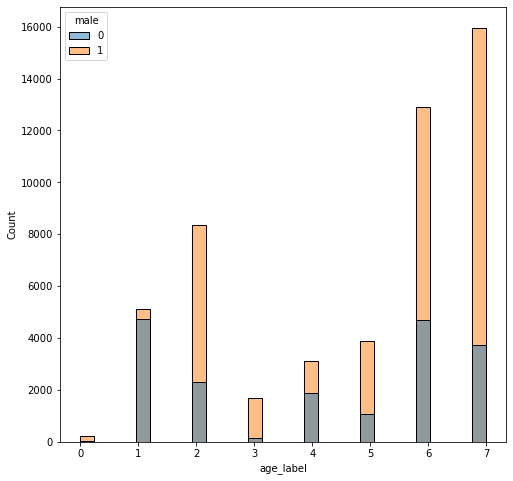

In [29]:
plt.figure(figsize=(8,8))
sns.histplot(x='age_label',data=df_features,hue='male')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

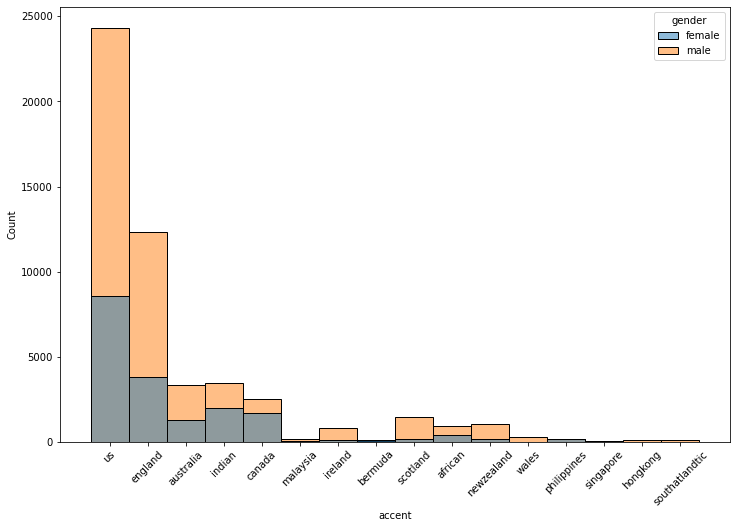

In [14]:
plt.figure(figsize=(12,8))
ax = sns.histplot(x='accent',data=df_features,hue='gender')
plt.xticks(rotation=45)

In [15]:
### dropping the accent column because of the imbalanced dataset
df_features = df_features.drop('accent',axis=1)

Label 0: female || 1: male

In [16]:
### hot encoding the gender attribute
gender = pd.get_dummies(df_features['gender'],drop_first=True)
df_features = df_features.drop('gender',axis=1)
df_features = pd.concat([df_features,gender],axis=1)

Label 7: twenties ||
6: thirties ||
2: fourties ||
1: fifties ||
4: sixties ||
5: teens ||
3: seventies ||
0: eighties 

In [17]:
from sklearn.preprocessing import LabelEncoder

In [22]:
### label encoding the age attribute
encoding = LabelEncoder()
encoding.fit(df_features['age'])
age = encoding.transform(df_features['age'])
age = pd.DataFrame(age,columns=['age_label'])
df_features = pd.concat([df_features,age],axis=1)

In [24]:
### hot encoding the age attribute
age = pd.get_dummies(df_features['age'],drop_first=True)
df_features = df_features.drop('age',axis=1)
df_features = pd.concat([df_features,age],axis=1)

In [25]:
df_features.to_csv('features_data.csv',index=False)

In [74]:
df_features = pd.read_csv('features_data.csv')

In [75]:
df_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_30,male,age_label,fifties,fourties,seventies,sixties,teens,thirties,twenties
0,-583.10974,100.370450,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-2.170289,0,7,0,0,0,0,0,0,1
1,-394.04380,99.290730,-38.356846,36.202087,13.018513,-0.332277,-30.521050,-24.611736,-20.024382,-8.018195,...,-1.527913,1,3,0,0,1,0,0,0,0
2,-329.92706,89.804886,-93.255320,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-1.986013,0,6,0,0,0,0,0,1,0
3,-544.49830,80.187970,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,2.014324,1,4,0,0,0,1,0,0,0
4,-265.77216,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,-0.406267,1,1,1,0,0,0,0,0,0


#### Train Test Split

In [76]:
df_features = df_features.drop(['fifties','fourties','seventies','sixties','teens','thirties','twenties'], axis = 1)

In [77]:
df_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,male,age_label
0,-583.10974,100.370450,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-10.564928,-2.081630,-4.345325,-5.543271,0.867665,-2.325722,-4.993744,-2.170289,0,7
1,-394.04380,99.290730,-38.356846,36.202087,13.018513,-0.332277,-30.521050,-24.611736,-20.024382,-8.018195,...,-1.825251,-5.490204,-5.979488,-5.525754,-3.199488,-12.229231,2.510893,-1.527913,1,3
2,-329.92706,89.804886,-93.255320,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-2.550232,-2.942057,-3.899509,5.903738,-2.495930,4.284184,2.987215,-1.986013,0,6
3,-544.49830,80.187970,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,-4.689697,-3.014753,-1.035969,-4.900939,-1.521831,-3.017688,-1.510514,2.014324,1,4
4,-265.77216,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,-0.586617,1.660018,-2.550889,1.886928,-5.248073,1.555064,-0.886034,-0.406267,1,1


In [78]:
X = df_features.drop(['male','age_label'],axis=1)
y = df_features[['male','age_label']]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62914, 30)
(6991, 30)
(62914, 2)
(6991, 2)


In [82]:
col_name = list(X_train.columns)

#### Feature Normalization

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [39]:
X_train = pd.DataFrame(X_train,columns=col_name)
X_test = pd.DataFrame(X_test,columns=col_name)

In [40]:
y_train = y_train.reset_index()
y_train = y_train.drop('index',axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop('index',axis=1)

In [41]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

### Gender Classification

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [49]:
X_train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,0.564395,0.353829,-0.278928,0.244259,-0.181786,-0.359068,-0.434922,0.421213,-2.619306,-0.233284,...,-0.752095,-0.047534,-1.596541,-2.185107,-0.475254,-2.322643,-0.664499,-1.974565,-0.852845,0.497673
1,-1.267875,-2.791355,-0.087076,1.215719,-0.609884,-0.713474,-0.228118,-1.044130,0.946386,-0.418563,...,1.012054,1.152340,0.962649,1.060207,1.568758,1.971719,1.215556,2.248357,0.764481,0.759086
2,1.255162,-0.192609,0.540949,-1.715435,0.274440,2.556369,-1.519288,0.040003,-0.116192,0.200872,...,0.452080,-0.511977,0.175765,-0.709609,-1.761413,-0.222903,-0.364405,-1.224240,0.260271,-0.052288
3,-1.142260,-0.058441,0.073180,0.767581,-0.707162,0.221958,-0.094128,0.026847,-0.713516,0.806025,...,-1.707473,0.421067,0.210689,0.256840,-0.117659,-0.285450,-1.195636,-0.097772,-0.528391,-0.231970
4,-0.242462,-0.681530,-0.062332,-0.463858,-1.458397,0.806520,-0.685224,0.200540,-0.058170,0.478191,...,0.820614,0.000589,-0.148946,0.207631,0.275857,-0.189223,-0.384763,-0.225240,0.261362,-0.031957


In [50]:
y_gender_train = y_train['male']
y_gender_test = y_test['male']

##### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [47]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

In [48]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.8915752278222058

0.8332141324560148

[[1031  317]
 [ 849 4794]]

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1348
           1       0.94      0.85      0.89      5643

    accuracy                           0.83      6991
   macro avg       0.74      0.81      0.77      6991
weighted avg       0.86      0.83      0.84      6991



##### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model = KNeighborsClassifier()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [6]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [55]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9548720896809427

0.9326276641396081

[[1537  128]
 [ 343 4983]]

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1665
           1       0.97      0.94      0.95      5326

    accuracy                           0.93      6991
   macro avg       0.90      0.93      0.91      6991
weighted avg       0.94      0.93      0.93      6991



In [57]:
joblib.dump(model,'KNN_gender_detection.pkl')

['KNN_gender_detection.pkl']

##### SVM

In [52]:
from sklearn.svm import SVC

In [ ]:
model = SVC(C=100)
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [8]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9528063701689649

0.9304820483478758

[[1599  205]
 [ 281 4906]]

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1804
           1       0.96      0.95      0.95      5187

    accuracy                           0.93      6991
   macro avg       0.91      0.92      0.91      6991
weighted avg       0.93      0.93      0.93      6991



##### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [11]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.8603625673689368

0.7961664997854384

[[1176  721]
 [ 704 4390]]

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1897
           1       0.86      0.86      0.86      5094

    accuracy                           0.80      6991
   macro avg       0.74      0.74      0.74      6991
weighted avg       0.80      0.80      0.80      6991



##### Bagging Decision Tree

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model.fit(X_train, y_gender_train)
pred = model.predict(X_test)

In [197]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9014679075122326

0.8530968387927336

[[1266  413]
 [ 614 4698]]

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1679
           1       0.92      0.88      0.90      5312

    accuracy                           0.85      6991
   macro avg       0.80      0.82      0.81      6991
weighted avg       0.86      0.85      0.86      6991



##### Boosting Decision Tree

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
model.fit(X_train, y_gender_train)
pred = model.predict(X_test)

In [17]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.89351376574895

0.8367901587755686

[[1063  324]
 [ 817 4787]]

              precision    recall  f1-score   support

           0       0.57      0.77      0.65      1387
           1       0.94      0.85      0.89      5604

    accuracy                           0.84      6991
   macro avg       0.75      0.81      0.77      6991
weighted avg       0.86      0.84      0.85      6991



##### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [203]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9218778994247543

0.8795594335574309

[[1181  143]
 [ 699 4968]]

              precision    recall  f1-score   support

           0       0.63      0.89      0.74      1324
           1       0.97      0.88      0.92      5667

    accuracy                           0.88      6991
   macro avg       0.80      0.88      0.83      6991
weighted avg       0.91      0.88      0.89      6991



##### Neural Network 

In [5]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
# CODE HERE
model = Sequential()

model.add(Dense(30,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(16,activation='relu',kernel_regularizer = regularizers.l2(0.01)))
#model.add(Dropout(0.2))
#model.add(Dense(7,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(18,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(9,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(4,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(2,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [119]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [120]:
model.fit(X_train,y_gender_train,epochs=90,batch_size=256,validation_data=(X_test,y_gender_test))

Epoch 1/90
246/246 [==============================] - 3s 6ms/step - loss: 0.4370 - accuracy: 0.8056 - val_loss: 0.3802 - val_accuracy: 0.8431
Epoch 2/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3585 - accuracy: 0.8514 - val_loss: 0.3550 - val_accuracy: 0.8517
Epoch 3/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3408 - accuracy: 0.8582 - val_loss: 0.3432 - val_accuracy: 0.8582
Epoch 4/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3298 - accuracy: 0.8633 - val_loss: 0.3345 - val_accuracy: 0.8600
Epoch 5/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3218 - accuracy: 0.8672 - val_loss: 0.3273 - val_accuracy: 0.8640
Epoch 6/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3159 - accuracy: 0.8699 - val_loss: 0.3221 - val_accuracy: 0.8667
Epoch 7/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3111 - accuracy: 0.8722 - val_loss: 0.3189 - val_accuracy: 0.8654
Epoch 

In [121]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 30)                930       
                                                                 
 dense_36 (Dense)            (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None


<AxesSubplot:>

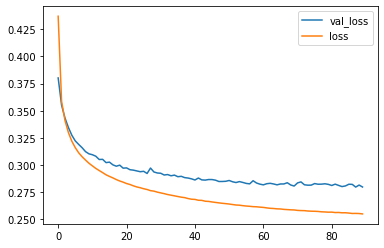

In [122]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses[['val_loss','loss']].plot()

In [123]:
pred = (model.predict(X_test) > 0.5).astype("int32")

219/219 [==============================] - 1s 3ms/step


In [124]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9228705566733736

0.8848519525103705

[[1370  295]
 [ 510 4816]]

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1665
           1       0.94      0.90      0.92      5326

    accuracy                           0.88      6991
   macro avg       0.84      0.86      0.85      6991
weighted avg       0.89      0.88      0.89      6991



### Age Category Classification

In [3]:
y_age_train = y_train['age_label']
y_age_test = y_test['age_label']

##### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression(max_iter=10000000000000)
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [105]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.37658227933088945

0.32770705192390215

[[   0    1    1    0    0    0    0    1]
 [   1   87   60    5   48   21   43   70]
 [   1   73  134   14   22   24  134   96]
 [   0    1    0    3    0    2    0    2]
 [   0   14   15    2   25    4   12   12]
 [   0    5    7    0    0   28    9    4]
 [   8  386  319   76  194  121  805  566]
 [  17  429  517   83  198  295  787 1209]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.09      0.26      0.13       335
           2       0.13      0.27      0.17       498
           3       0.02      0.38      0.03         8
           4       0.05      0.30      0.09        84
           5       0.06      0.53      0.10        53
           6       0.45      0.33      0.38      2475
           7       0.62      0.34      0.44      3535

    accuracy                           0.33      6991
   macro avg       0.18      0.30      0.17      6991
weighted avg    

##### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
model = KNeighborsClassifier()
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [108]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.7962944851183236

0.795737376627092

[[  18    2    0    0    2    1    3    5]
 [   0  852   41    7   18   33   79   94]
 [   2   19  861    3   10   24   77   96]
 [   0    1    3  154    4    4   14   10]
 [   0   15   21    2  413   12   29   43]
 [   0    5    2    1    2  325   21   21]
 [   6   60   64    8   28   48 1478  229]
 [   1   42   61    8   10   48   89 1462]]

              precision    recall  f1-score   support

           0       0.67      0.58      0.62        31
           1       0.86      0.76      0.80      1124
           2       0.82      0.79      0.80      1092
           3       0.84      0.81      0.83       190
           4       0.85      0.77      0.81       535
           5       0.66      0.86      0.75       377
           6       0.83      0.77      0.80      1921
           7       0.75      0.85      0.79      1721

    accuracy                           0.80      6991
   macro avg       0.78      0.77      0.77      6991
weighted avg       

In [110]:
joblib.dump(model, 'KNN_age_model.pkl')

['KNN_age_model.pkl']

##### SVM

In [111]:
from sklearn.svm import SVC

In [ ]:
model = SVC(C=1)
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [152]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.7614100194796487

0.7608353597482478

[[  20    0    1    0    1    0    1    2]
 [   1  798   25    6   16   18   68   92]
 [   1   22  790    5   12   32   55   95]
 [   0    1    2  135    1    1    6    9]
 [   0    3   11    1  373    5   20   26]
 [   0    8   10    1    8  289   22   32]
 [   4   79   98   11   37   62 1413  203]
 [   1   85  116   24   39   88  205 1501]]

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.80      0.78      0.79      1024
           2       0.75      0.78      0.77      1012
           3       0.74      0.87      0.80       155
           4       0.77      0.85      0.81       439
           5       0.58      0.78      0.67       370
           6       0.79      0.74      0.76      1907
           7       0.77      0.73      0.75      2059

    accuracy                           0.76      6991
   macro avg       0.74      0.79      0.76      6991
weighted avg      

##### Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
model = DecisionTreeClassifier()
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [8]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.40225615103109547

0.40208839937061935

[[  6   0   1   1   0   1   4   7]
 [  3 409  95  28  48  40 204 195]
 [  4 107 399  23  52  61 175 216]
 [  0  20  15  37   4   6  50  42]
 [  2  46  59  11 201  19  85 104]
 [  4  50  49  11  22 126 106 126]
 [  4 175 204  37  83  96 758 395]
 [  4 189 231  35  77 146 408 875]]

              precision    recall  f1-score   support

           0       0.22      0.30      0.26        20
           1       0.41      0.40      0.41      1022
           2       0.38      0.38      0.38      1037
           3       0.20      0.21      0.21       174
           4       0.41      0.38      0.40       527
           5       0.25      0.26      0.25       494
           6       0.42      0.43      0.43      1752
           7       0.45      0.45      0.45      1965

    accuracy                           0.40      6991
   macro avg       0.34      0.35      0.35      6991
weighted avg       0.40      0.40      0.40      6991



##### Bagging Decision Tree

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model.fit(X_train, y_age_train)
pred = model.predict(X_test)

In [11]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.5177393450250413

0.512516092118438

[[   3    0    0    0    0    0    0    0]
 [   0  553   77   19   48   52  157  169]
 [   6   87  525   23   43   54  180  179]
 [   0    0    6   57    1    1    4    3]
 [   1   15   16    3  197    9   22   30]
 [   2   13   12    2    6  122   29   39]
 [   7  164  196   41   97  114 1023  437]
 [   8  164  221   38   95  143  375 1103]]

              precision    recall  f1-score   support

           0       0.11      1.00      0.20         3
           1       0.56      0.51      0.53      1075
           2       0.50      0.48      0.49      1097
           3       0.31      0.79      0.45        72
           4       0.40      0.67      0.51       293
           5       0.25      0.54      0.34       225
           6       0.57      0.49      0.53      2079
           7       0.56      0.51      0.54      2147

    accuracy                           0.51      6991
   macro avg       0.41      0.63      0.45      6991
weighted avg       

##### Boosting Decision Tree

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
model.fit(X_train, y_age_train)
pred = model.predict(X_test)

In [14]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.395014876392853

0.3428694035188099

[[   2    0    0    0    0    0    0    0]
 [   1  131   41    2   26    8   43   43]
 [   1   40  125    7   13   20   70   69]
 [   0    0    2    2    0    1    0    1]
 [   0    5    2    3   28    1    5    8]
 [   0    6    7    0    1   19    6    9]
 [   8  324  310   94  161  130  763  503]
 [  15  490  566   75  258  316  903 1327]]

              precision    recall  f1-score   support

           0       0.07      1.00      0.14         2
           1       0.13      0.44      0.20       295
           2       0.12      0.36      0.18       345
           3       0.01      0.33      0.02         6
           4       0.06      0.54      0.10        52
           5       0.04      0.40      0.07        48
           6       0.43      0.33      0.37      2293
           7       0.68      0.34      0.45      3950

    accuracy                           0.34      6991
   macro avg       0.19      0.47      0.19      6991
weighted avg       

##### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier()
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [17]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.6567027435146164

0.6501215848948648

[[   6    0    0    0    0    0    0    1]
 [   0  602   16    2   15   16   22   30]
 [   1   20  587    8   10   11   39   50]
 [   0    0    0   71    0    0    0    0]
 [   0    1    4    1  251    0    0    3]
 [   0    1    1    0    0  123    0    2]
 [  12  155  181   48  106  110 1343  312]
 [   8  217  264   53  105  235  386 1562]]

              precision    recall  f1-score   support

           0       0.22      0.86      0.35         7
           1       0.60      0.86      0.71       703
           2       0.56      0.81      0.66       726
           3       0.39      1.00      0.56        71
           4       0.52      0.97      0.67       260
           5       0.25      0.97      0.40       127
           6       0.75      0.59      0.66      2267
           7       0.80      0.55      0.65      2830

    accuracy                           0.65      6991
   macro avg       0.51      0.83      0.58      6991
weighted avg      

##### XG Boost

In [4]:
import xgboost as xgb

In [5]:
model = xgb.XGBClassifier()
model.fit(X_train, y_age_train)
pred = model.predict(X_test)

In [7]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.5942879832278003

0.5903304248319268

[[  10    0    0    0    0    0    0    1]
 [   1  590   46   10   23   15   69   75]
 [   4   44  511    6   21   24   88  109]
 [   0    1    3   89    2    0    4    7]
 [   0   12   17    2  242    4   15   14]
 [   0    7   12    1    2  148   16   25]
 [   5  149  198   44  115  107 1149  341]
 [   7  193  266   31   82  197  449 1388]]

              precision    recall  f1-score   support

           0       0.37      0.91      0.53        11
           1       0.59      0.71      0.65       829
           2       0.49      0.63      0.55       807
           3       0.49      0.84      0.62       106
           4       0.50      0.79      0.61       306
           5       0.30      0.70      0.42       211
           6       0.64      0.55      0.59      2108
           7       0.71      0.53      0.61      2613

    accuracy                           0.59      6991
   macro avg       0.51      0.71      0.57      6991
weighted avg      

#### Neural Network

##### Deep Learning

In [5]:
y_age_train = y_train.drop(['male','age_label'],axis=1)
y_age_test = y_test.drop(['male','age_label'],axis=1)

In [4]:
from keras import layers, models, optimizers, losses, metrics
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [138]:
# CODE HERE
model = Sequential()

model.add(InputLayer(input_shape=30))
model.add(Dense(200,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(150,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(112,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(84,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(63,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(48,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(36,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(27,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(21,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(15,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(2,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

In [139]:
earlystop = EarlyStopping(monitor='val_loss',patience=3)

In [140]:
losses = {'output_1':'binary_crossentropy'}

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
model.fit(X_train,y_age_train,epochs=190,batch_size=256,validation_data=(X_test,y_age_test),callbacks=earlystop)

Epoch 1/190
246/246 [==============================] - 2s 5ms/step - loss: 0.4140 - accuracy: 0.2937 - val_loss: 0.3690 - val_accuracy: 0.3084
Epoch 2/190
246/246 [==============================] - 1s 6ms/step - loss: 0.3592 - accuracy: 0.3581 - val_loss: 0.3444 - val_accuracy: 0.4048
Epoch 3/190
246/246 [==============================] - 1s 4ms/step - loss: 0.3289 - accuracy: 0.4509 - val_loss: 0.3136 - val_accuracy: 0.4765
Epoch 4/190
246/246 [==============================] - 1s 5ms/step - loss: 0.2974 - accuracy: 0.5149 - val_loss: 0.2925 - val_accuracy: 0.5207
Epoch 5/190
246/246 [==============================] - 1s 5ms/step - loss: 0.2715 - accuracy: 0.5697 - val_loss: 0.2727 - val_accuracy: 0.5726
Epoch 6/190
246/246 [==============================] - 1s 5ms/step - loss: 0.2508 - accuracy: 0.6116 - val_loss: 0.2630 - val_accuracy: 0.5870
Epoch 7/190
246/246 [==============================] - 1s 4ms/step - loss: 0.2356 - accuracy: 0.6410 - val_loss: 0.2547 - val_accuracy: 0.6068

In [143]:
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_251 (Dense)           (None, 200)               6200      
                                                                 
 dense_252 (Dense)           (None, 150)               30150     
                                                                 
 dense_253 (Dense)           (None, 112)               16912     
                                                                 
 dense_254 (Dense)           (None, 84)                9492      
                                                                 
 dense_255 (Dense)           (None, 63)                5355      
                                                                 
 dense_256 (Dense)           (None, 48)                3072      
                                                                 
 dense_257 (Dense)           (None, 36)              

<AxesSubplot:>

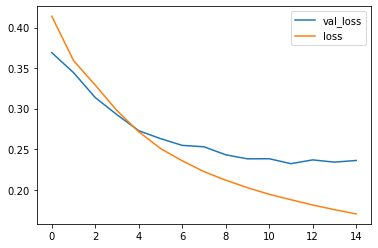

In [144]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses[['val_loss','loss']].plot()

In [145]:
pred = (model.predict(X_test) > 0.5).astype("int32")

219/219 [==============================] - 1s 3ms/step


In [146]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
#print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.6595140112999031

0.6076383922185667


              precision    recall  f1-score   support

           0       0.65      0.79      0.71       821
           1       0.58      0.75      0.66       810
           2       0.47      0.80      0.59       107
           3       0.62      0.75      0.68       403
           4       0.35      0.73      0.48       237
           5       0.60      0.71      0.65      1514
           6       0.69      0.65      0.67      2075

   micro avg       0.61      0.71      0.66      5967
   macro avg       0.57      0.74      0.63      5967
weighted avg       0.62      0.71      0.66      5967
 samples avg       0.61      0.61      0.61      5967



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Real Time Model Testing

In [11]:
import joblib

In [12]:
## Voice Data Feature Extraction

### extract the features from the audio files using mfcc
def feature_extracter(fileName):
    audio,sample_rate = librosa.load(fileName,res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=30)
    mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
    
    return list(mfccs_scaled_features)

In [37]:
fileName = 'C:\\Users\\Dell\\Downloads\\narendra-modi-walking-out-of-karan-thapar-interview-tuberippercom_R89R3fPq.wav'
col_name = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5','Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10','Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15','Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20','Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25','Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30']

In [38]:
observation = [feature_extracter(fileName)]
observation = pd.DataFrame(observation, columns = col_name)

In [39]:
## scaling the observation
scaler = joblib.load('scaler.pkl')
scaled_observation = scaler.transform(observation)
scaled_observation = pd.DataFrame(scaled_observation, columns = col_name)

In [40]:
### Gender classification model
gender_model = joblib.load('KNN_gender_detection.pkl')
gender_predict = gender_model.predict(scaled_observation)
## considering the labels 1 = male 0 = female
if gender_predict[0] == 1:
    print('Male')
else:
    print('Female')

Male


In [41]:
def age_reverse_labelling(label):
    if label == 0:
        return 'Eighties'
    if label == 1:
        return 'Fifties'
    if label == 2:
        return 'Fourties'
    if label == 3:
        return 'Seventies'
    if label == 4:
        return 'Sixties'
    if label == 5:
        return 'Teens'
    if label == 6:
        return 'Thirties'
    if label == 7:
        return 'Twenties'
    else:
        return 'Cannot be predicted'

In [42]:
### Age classification model
age_model = joblib.load('KNN_age_model.pkl')
age_predict = age_model.predict(scaled_observation)
## considering the labels 1 = male 0 = female
print(age_reverse_labelling(age_predict[0]))

Twenties
